<a href="https://colab.research.google.com/github/nicholasrichers/regressao-neuron/blob/master/Regressao_na_Pratica_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão na prática


*(introdução básica sobre como será o curso... as anotações nessa área servirão para nos ajudar a guiar a aula e nao esquecer nenhum detalhe importante, e deixar como registro posterior para o aluno)*


- Quando aplicar? (pode usar o daset abaixo para explicar)
- Diferenciação de técnicas de regressão em relação a de classificação
- Introdução a técnicas de regressão (seção seguinte)






---



---



## Conjunto de dados

Nesse treinamento vamos usar um dataset muito conhecido na literatura, chamado [boston housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), que usa dados demograficos/socioeconômicos da região para prever a mediana dos preços das casas em casa região da cidade (revisar)



-> traduzir a descrição das colunas

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per USD10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV (target) - Median value of owner-occupied homes in USD1000's (em milhares)



In [33]:
#impotando a biblioteca pandas
import pandas as pd

In [34]:
#url onde o dataset está armazenado
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

#importando o dataset para o pandas
df = pd.read_csv(url)

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))

O dataset possui 506 linhas (registros) e 14 colunas (features)


Uma amostra do dataset

In [35]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Descrição das variáveis **numéricas**. *(se nao for relevante pode apagar)*

In [36]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




---



---



> **Train/Test Split**

In [37]:
#Armazenando todas as colunas do dataframe com exceção da última numa lista
features = df.columns[:-1]

#X será todas as colunas com excecão do target
X = df[features]

#y é a nossa variável target
y = df["medv"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



---



---



## Tipos de regressão

### Linear simples

*(incluir aqui uma explicação teorica bem básica de regressão linear simples, tente incluir algumas formulas usando markdown, veja nesse [guia](https://colab.research.google.com/notebooks/markdown_guide.ipynb), inclua também as fontes, pra esse assunto, gosto [desse blog](https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/), mas use a fonte que vc preferir)*

> **Prevendo o preço das casas a partir de uma variável**

*(eu faria uma regressao simples, entre uma das colunas do dataset com o target, use a feature mais correlacionada ou uma que a descricao pareça fazer mais sentido)*

In [39]:
#quando trabalhamos com apenas uma coluna, precisamos transformar em array do tipo (n_samples, 1)
X_Rooms_train  = X_train["rm"].values.reshape(-1,1)
X_Rooms_test  = X_test["rm"].values.reshape(-1,1)


#Apenas a coluna RM
X_Rooms_test[:5]

array([[6.416],
       [6.758],
       [5.983],
       [6.065],
       [6.297]])

In [40]:
#crie um exemplo na mao que seja natural de ler usando as formulas acima

#y = a*x +b 

In [41]:
df.corr() ## RM x medv APAGAR DEPOIS

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


> **Usando** [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

#criando o nosso modelo como todos os parametros "Default"
reg = LinearRegression()

#treinando o model
reg.fit(X_Rooms_train, y_train)

#Coeficientes
print("Coeficiente: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

#salvando nossas predicoes
preds_sklearn = reg.predict(X_Rooms_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg.score(X_Rooms_test, y_test)))

Coeficiente: [9.34830141]
Intercept: -36.24631889813795
R2: 0.3707569232254778


> **Plotando os modelos**


Caso queira aprender mais sobre matplotlib, temos um [treinamento](https://github.com/nicholasrichers/dataviz-neuron/blob/master/Treinamento_Dataviz.ipynb) específico para essa biblioteca

*(crie aqui um um plot usando dos 2 exemplos acima na mesmo gráfico + valores reais)*

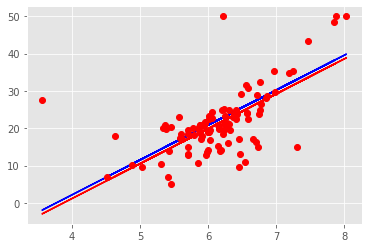

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Modelo criado manualmente
plt.plot(X_Rooms_test, preds_sklearn+1, color="blue")

#Modelo criado com sklearn
plt.plot(X_Rooms_test, preds_sklearn, color="red")

#Valores Preditos
plt.plot(X_Rooms_test, y_test, 'ro')


#plt.plot(X_Rooms_train, y_train, 'bo')

plt.show()



---



---



### Regressão Múltipla

A  nossa análise pode melhorar muito se incluirmos as demais features em nossa análise, faremos isso usando regressão múltipla. E existem algumas maneiras diferentes paraestimarmos os coeficientes e começaremos falando de duas delas.

*(eu gosto desse [post](https://machinelearningmastery.com/linear-regression-for-machine-learning/) sobre o assunto)*

> **Método dos Mínimos Quadrados (Ordinary Least Squares - OLS)**


Descrição:

Esse procedimento busca minimizar a soma do quadrados dos resíduios e dessa forma estimar uma solução única para o vetor de parâmetros ($b$). Partindo do nosso problema original temos que:

>$y=X.b$ (1)

Onde $X$ é a nossa matriz de features, $y$ é o preço estimado das casas e $b$, o vetor de coefientes que precisamos estimar. Extendendo a eq. (1), temos que:

> $X' . y = X'. X.b $ (2)

Onde bastou multiplicartmos ambos os lados pela matriz transposta $(X')$. Em seguida desenvolvendo a eq. (2) algebricamente e isolando $b$, temos:


> $b = (X' . X)^{-1} . X' . y$ (3)


Note que $(X' . X)^{-1} . X'$, é conhecida como a [pseudo-inversa](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) de $X$.

Finalmente, usaremos a eq. (3) para estimar nosso vetor $b$, onde:


```
np.linalg.inv(X_train.T.dot(X_train))
```
Representa $(X' . X)^{-1} $


In [44]:
#Determinando b pelo método OLS, manualmente
b = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

#Coeficientes
print("Coeficientes: {}".format(b))

#Gerando as predições
preds_ols = X_test.dot(b)

Coeficientes: [-0.10047235  0.03417569  0.033571    2.73965227 -5.15511967  6.19597333
 -0.01108091 -1.020035    0.13881847 -0.00779673 -0.45408744  0.0168434
 -0.42589164]




---



---



> **Usando skelarn**

A função [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), também usa o método OLS.

In [45]:
# faca o mesmo exemplo de uma variável usando sklearn
#criando o nosso modelo como todos os parametros "Default"
reg_ols = LinearRegression()

#treinando o model
reg_ols.fit(X_train, y_train)

#Coeficientes
print("Coeficientes: {}".format(reg_ols.coef_))
print("Intercept: {}".format(reg_ols.intercept_))
#salvando nossas predicoes
preds_ols_sklearn = reg_ols.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_ols.score(X_test, y_test)))



Coeficientes: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.24675099392401
R2: 0.6687594935356298


> **Comparando nosso modelo OLS criado manualmente com o sklearn**

Vemos que as prediçoes de ambos os modelos são na grande maioria bem próximas.

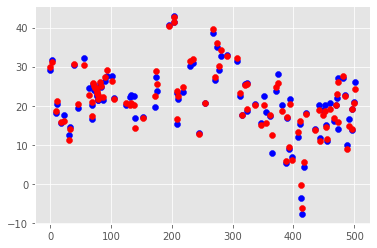

In [46]:
#predições do modelo manual
plt.scatter(preds_ols.index, preds_ols, color="blue")

#predições do modelo sklearn
plt.scatter(preds_ols.index, preds_ols_sklearn, color="red")

Vantagens
- Fornece uma maneira elegante e direta de implementarmos manualmente usando notação matricial.
- A demonstração desse método levará a algumas considerações importantes que usaremos mais a frente nesse estudo.


Desvantagens:
- Você precisa carregar todo o dataset na memória de uma vez e calcular uma matriz inversa, o que pode ser custoso computacionamente em um dataset grande (não é o nosso caso aqui)



---



---



> **Método de Descida Gradiente (Gradient Descent)**

*( bom resumo abaixo)*

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.


When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure.


Gradient descent is often taught using a linear regression model because it is relatively straightforward to understand. In practice, it is useful when you have a very large dataset either in the number of rows or the number of columns that may not fit into memory.



Gradient Descent




In [47]:
#Não estou certo se aqui vale a pena criar um exemplo na mao, talvez um gif seja mais explicativo


#ESSE POST É Excelente, usa o mesmo dataset e implementa a mesma ideia

#https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c



---



---



> Usando Sklearn

Como a regressão linear é feita usando o método OLS, aqui vamos usar o [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) ... (explicar a diferenca usando gradiente estocástico)

In [48]:
# faca o mesmo exemplo de uma variável usando sklearn
#criando o nosso modelo como todos os parametros "Default"
from sklearn.linear_model import SGDRegressor

reg_sgd =  SGDRegressor() #LinearRegression()

#treinando o model
reg_sgd.fit(X_train, y_train)

#Coeficientes
print("Coeficiente: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))

#salvando nossas predicoes
preds_sklearn = reg_sgd.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_sgd.score(X_test, y_test)))

Coeficiente: [ 2.22079081e+11 -1.90849870e+11 -4.47311195e+11 -1.80140746e+09
 -9.07819626e+09  2.65243142e+11  4.17375484e+11  3.05590970e+11
  7.31593542e+10 -1.54958418e+11  2.48872019e+11  7.86921956e+10
 -2.18036104e+11]
Intercept: [2.08235236e+10]
R2: -1.0484877319454013e+25


> Plotando os modelos

*(crie aqui um um plot usando dos 2 exemplos do skelarn)*

In [49]:
#SGDRegressor vs Linear()

Além das duas formulações acima, poderíamos estimar os coeficientes estimando a **máxima verossimilhança**, não cobriremos esse método nesse treinamento, mas há uma excelente fonte inicial [aqui](https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/). 



---



---



### Métricas

> **Como comparar os modelos usando essas métricas**

- Representacao teórica (formula)
- Breve explicacao do que ela representa
- Possiveis desvantagens

In [14]:
# Acho que não precisa criar código manual, usar make_scorer do skelarn a metrica padrao .score() é o r2

In [ ]:
# compare os 2 modelos do sklearn, o reg_ols e o reg_sgd

 Parte 1 gabriela até aqui (entre 60 e 75 min)
 Avaliar se vale a pena fz pausa para perguntas ou descanso



---



---



> **Intepretação dos modelos (análise dos resíduos)**

In [ ]:
#aqui falar novamente da OLS



---



---



## Polinomial

 reg simples com alguma das featutes com corr quadratica

In [ ]:
#colocar aqui exemplo do MLM bias & var

 Bias & variancia... regularização



 There are extensions of the training of the linear model called regularization methods. These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

Two popular examples of regularization procedures for linear regression are:

Lasso Regression: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
Ridge Regression: where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

Na primeira parte desse treinamento, vamos usar um conjunto de [dados sintético](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression), pois dessa forma podemos explorar algumas propriedades dos modelos de regressão de maneira mais assertiva.

*(explicar brevemente  os parâmetros do make_regression, e observar no link acima se há mais parâmetros interessantes para serem usados como bias... )*



In [15]:
#sintetico

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

Algoritmos com regularizacao (LASSO, elasticnet), ridge regression, GLM(?)

Como ajustar os parametros

Critérios para escolher modelos lineares doc sklearn

- dimensionalidade
- nivel de ruido
- outros...


desvantagens de modelos lineares

Modelos de regressao não linear (arvores e knn)

In [ ]:
# plot knn https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4

regressao stepwise

*(nao existe de maneira explícita no skelarn mas vc pode usar RFE como diz [aqui](https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm))*

In [ ]:
#aqui usar dado sintético parece uma boa ideia
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

## Comparacao de modelos 

**Preparing Data For Linear Regression**

Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).


Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.


Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.


Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.


Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

Dataset

[link](https://archive.ics.uci.edu/ml/datasets/student+performance), [descrição](https://github.com/nicholasrichers/regressao-neuron/blob/master/student_dataset/student.txt)

In [ ]:
#student

dados_url = 'https://raw.githubusercontent.com/nicholasrichers/regressao-neuron/master/student_dataset/student-mat.csv'

Pycaret // comparacao

hiperparametros

Pt 2 até aqui, pausa para perguntas e se houver tempo...

Ranking models (extra)